In [1]:
import numpy as np
np.bool = np.bool_
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import (KMeans, AgglomerativeClustering)
from scipy.cluster.hierarchy import (dendrogram, cut_tree)
from ISLP.cluster import compute_linkage
import sklearn.datasets as load
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import sklearn.model_selection as skm
from ISLP import confusion_table
import warnings
warnings.filterwarnings('ignore')

### Problem 1

In [2]:
np.random.seed(1)
df1 = pd.DataFrame(np.random.normal(-1, 1, (50,50)))
df1['class'] = 1

df2 = pd.DataFrame(np.random.normal(0, 1, (50,50)))
df2['class'] = 2

df3 = pd.DataFrame(np.random.normal(1, 1, (50,50)))
df3['class'] = 3

df = pd.concat([df1, df2, df3])
df_var = df.drop(['class'], axis=1)

#### (a)

Text(0, 0.5, 'PC2')

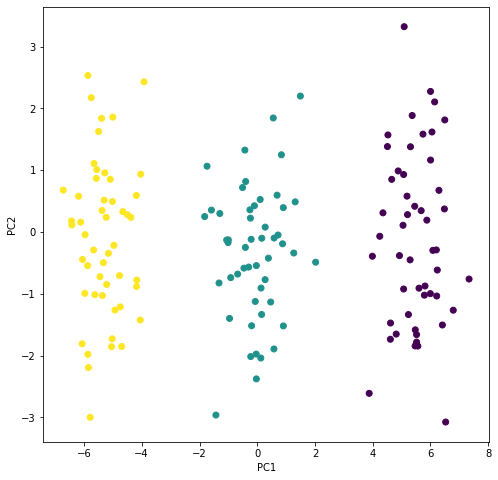

In [3]:
pca = PCA(n_components=2)
pca.fit(df_var)
scaler = StandardScaler(with_std=True , with_mean=True)
df_scaled = scaler.fit_transform(df_var)
scores = pca.transform(df_scaled)

i, j = 0, 1
fig , ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1], c = df['class'])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))

#### (b)

In [4]:
def kmeans(k, data):
    np.random.seed(1)
    d = data.copy()
    d['cluster'] = np.random.randint(1, high=k+1, size=data.shape[0], dtype=int)
    change = 1
    while change != 0:
        centroids = d.groupby('cluster')[0].apply(lambda x: np.mean(x.tolist(), axis=0))
        centroids = centroids.reset_index()
        for col in d.columns[1:-1]:
            df = d.groupby('cluster')[col].apply(lambda x: np.mean(x.tolist(), axis=0))
            df = df.reset_index()
            centroids[col] = df[col]
        change = 0
        for i in range(data.shape[0]):
            dist = []
            point = np.asarray(data.iloc[[i]])
            for l in range(k):
                centroid = np.asarray(centroids.iloc[[l]].drop(['cluster'], axis=1))
                euc = np.linalg.norm(point - centroid)
                dist.append(euc)
            ind = dist.index(min(dist))
            new_cluster = ind + 1
            if new_cluster != d['cluster'].iloc[i]:
                change += 1
                d['cluster'].iloc[i] = new_cluster
    return d['cluster']  

Text(0, 0.5, 'PC2')

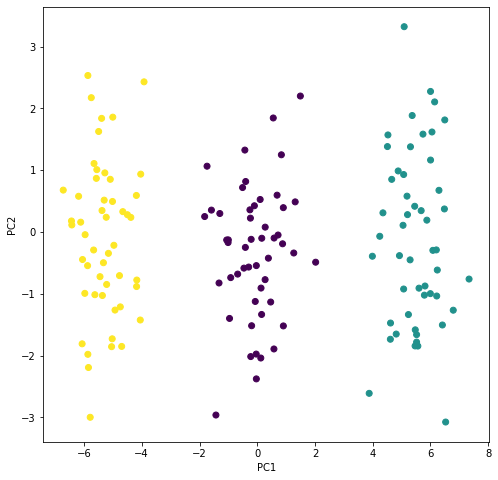

In [5]:
pca = PCA(n_components=2)
pca.fit(df_var)
scaler = StandardScaler(with_std=True , with_mean=True)
df_scaled = scaler.fit_transform(df_var)
scores = pca.transform(df_scaled)

i, j = 0, 1
fig , ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1], c = kmeans(3, df_var))
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))

#### (c)

Text(0, 0.5, 'PC2')

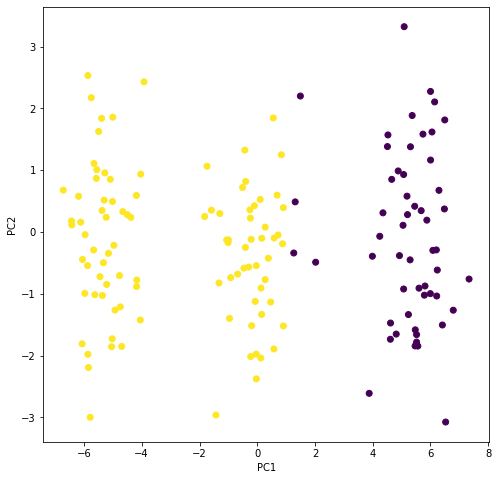

In [6]:
i, j = 0, 1
fig , ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1], c = kmeans(2, df_var))
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))

Text(0, 0.5, 'PC2')

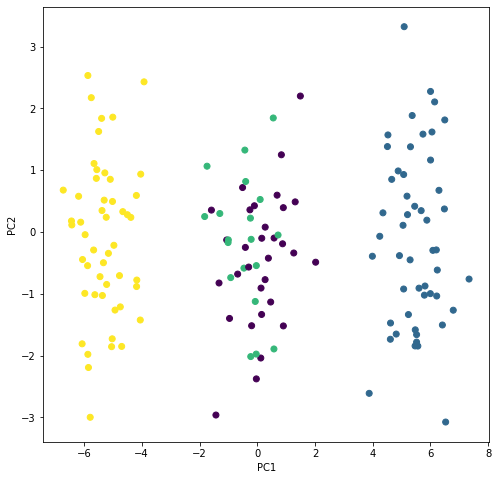

In [7]:
i, j = 0, 1
fig , ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1], c = kmeans(4, df_var))
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))

#### (d)

Text(0, 0.5, 'PC2')

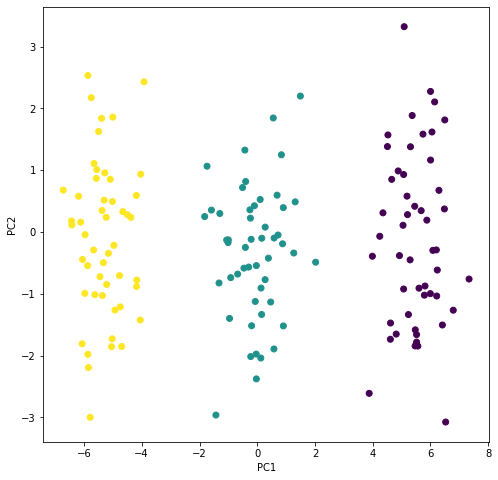

In [8]:
HClust = AgglomerativeClustering
hc_avg = HClust(distance_threshold=None, n_clusters=3, linkage='average');
hc_avg.fit(scores)

i, j = 0, 1
fig , ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1], c = hc_avg.labels_)
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))

### Problem 2

In [9]:
df, y = load.load_digits(n_class=10, return_X_y=True, as_frame=True)

#### (a)

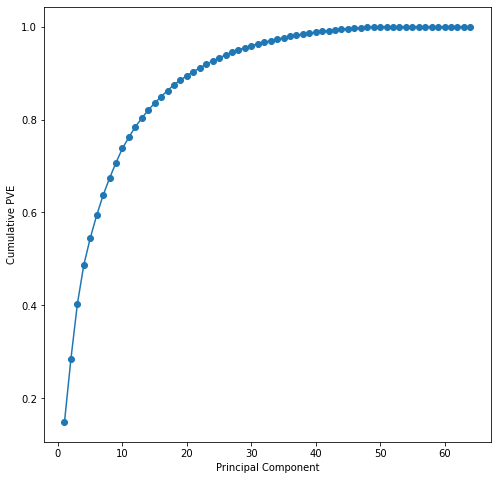

In [10]:
pca = PCA()
pca.fit(df)
scaler = StandardScaler(with_std=True , with_mean=True)
df_scaled = scaler.fit_transform(df)
scores = pca.transform(df_scaled)

fig , ax = plt.subplots(1, 1, figsize =(8,8))
ticks = np.arange(pca.n_components_)+1
ax.plot(ticks, pca.explained_variance_ratio_.cumsum(), marker='o');
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative PVE');

Text(0, 0.5, 'PC2')

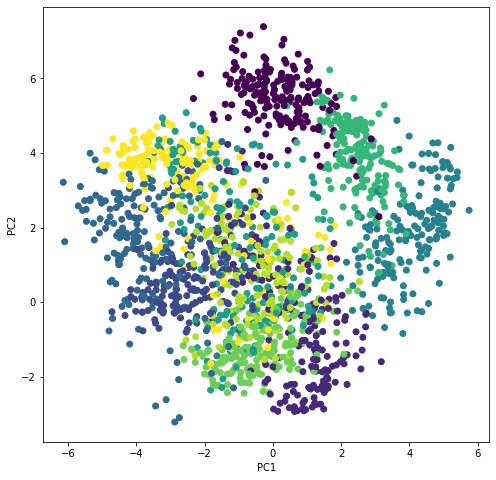

In [11]:
i, j = 0, 1
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1], c = y)
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))

#### (b)

Text(0, 0.5, 'PC2')

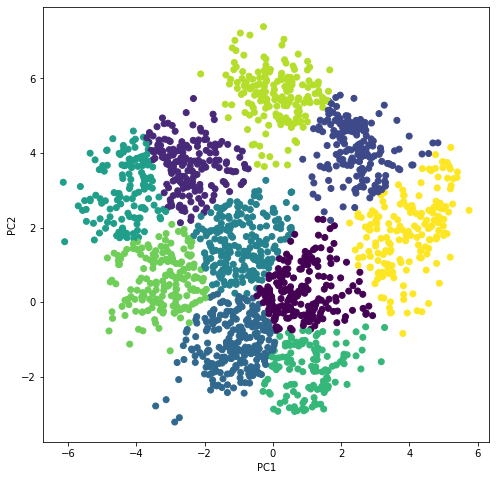

In [12]:
pca = PCA(n_components = 2)
pca.fit(df)
scaler = StandardScaler(with_std=True , with_mean=True)
df_scaled = scaler.fit_transform(df)
scores = pca.transform(df_scaled)
km = KMeans(n_clusters=10, random_state=1, n_init =20).fit(scores)

i, j = 0, 1
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1], c = km.labels_)
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))

#### (c)

In [13]:
pca = PCA(n_components = 2)
pca.fit(df)
scaler = StandardScaler(with_std=True , with_mean=True)
df_scaled = scaler.fit_transform(df)
scores = pca.transform(df_scaled)

x_train, x_test, y_train, y_test = train_test_split(scores, y, test_size=0.2, random_state=1)
kfold = skm.KFold(5, random_state=1, shuffle=True)
svm = SVC()
grid = skm.GridSearchCV(svm, {'C':[0.001,0.01,0.1,1,5,10], 'kernel':['poly', 'rbf'], 'degree':[1, 2, 3], 'gamma':['scale', 'auto']}, refit=True , cv=kfold , scoring='accuracy')
grid.fit(x_train, y_train)
grid.best_params_

{'C': 0.1, 'degree': 1, 'gamma': 'auto', 'kernel': 'rbf'}

In [15]:
best_ = grid.best_estimator_
y_test_hat = best_.predict(x_test)
print(accuracy_score(y_test, y_test_hat))
confusion_table(y_test_hat , y_test)

0.675


Truth,0,1,2,3,4,5,6,7,8,9
Predicted,,,,,,,,,,
0,38,0,0,0,0,1,2,0,0,0
1,0,17,0,0,0,0,0,5,1,1
2,0,0,26,5,0,1,0,0,0,1
3,0,0,3,23,0,1,0,0,1,0
4,1,0,0,0,35,0,2,0,0,0
5,1,2,0,1,0,2,0,0,2,3
6,3,0,0,0,3,1,33,0,0,0
7,0,3,0,2,0,4,0,25,3,1
8,0,13,5,2,0,14,0,7,19,3
